# K-means Clustering for Penguin Data

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries.

In this project, I'm tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this project is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. I'll use a K-means clustering model to group this data and identify patterns that provide important insights about penguins. 

## **Step 1: Imports** 


In [91]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`.

In [93]:
# RUN THIS CELL TO IMPORT THE DATA. 

# Save the `pandas` DataFrame in variable `penguins`. 

penguins = pd.read_csv("penguins.csv")

Reviewing the first 10 rows of data.


In [95]:
# Review the first 10 rows.

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, I'll determine how many different types of penguin species are in the dataset.

In [98]:
# Find out how many penguin types there are.

penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [99]:
# Find the count of each species type.

penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

There are 3 types of the penguins presented in the data.

- It's helpful to determine the perfect number of clusters using K-means even when we already know how many penguin species the dataset contains. We can explore whether the algorithm can discover the different species. We might even find other relationships in the data.

### Checking for missing values

An assumption of K-means is that there are no missing values. Checking for missing values in the rows of the data. 

In [104]:
# Check for missing values.

penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Droping the rows with missing values and saving the resulting pandas DataFrame in a variable named `penguins_subset`.

In [106]:
# Drop rows with missing values.
# Save DataFrame in variable `penguins_subset`.

penguins_subset=penguins.dropna(axis=0)

Checking to make sure that `penguins_subset` does not contain any missing values.

In [108]:
# Check for missing values.

penguins_subset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Reviewing the first 10 rows of the subset.

In [110]:
# View first 10 rows.

penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


### Encoding data

The code below will make sure all values are ALL CAPS. 

In [121]:
penguins_subset.loc[:,'sex'] = penguins_subset['sex'].str.upper()

K-means needs numeric columns for clustering. I'll convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [126]:
# Create a copy of the DataFrame subset to avoid SettingWithCopyWarning.
penguins_subset = penguins_subset.copy()

# Convert `sex` column from categorical to numeric.
penguins_subset.loc[:,'sex_MALE'] = np.where(penguins_subset['sex']=='MALE',1,0)

#Another approach
#penguins_subset = pd.get_dummies(penguins_subset,columns = ['sex'], drop_first= True)

### Droping a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.


In [61]:
# Drop the island column.

penguins_subset = penguins_subset.drop(['island','sex'], axis=1)

### Scaling the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. I'll use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 

Copying all the features except the `'species'` column to a DataFrame `X`. 

In [63]:
# Exclude `species` variable from X

X = penguins_subset.drop(['species'], axis= 1)

Scaling the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [65]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Step 3: Data modeling** 

To fit K-means and evaluate inertia for various k values, I'll start by writing a function, `kmeans_inertia`, that takes `num_clusters` and `x_vals` (X_scaled) as inputs. This function will return a list of inertia values for each `k`.

By setting the `random_state` to 42 in K-means, the results will be consistent and reproducible for others.

In [68]:
# Fit K-means and evaluate inertia for different values of k.
num_of_clusters = [i for i in range(2,11)]
def k_means_inertia(num_clusters, x_values):
    inertia = []
    for num in num_clusters:
        k_means = KMeans(n_clusters = num, random_state=42).fit(x_values)
        inertia.append(k_means.inertia_)
        
    return inertia
    

Using the `kmeans_inertia` function to return a list of inertia for `k=2 to 10`.

In [70]:
# Return a list of inertia for k=2 to 10.

list_inertia = k_means_inertia(num_of_clusters, X_scaled)
list_inertia

[885.6224143652249,
 578.8284278107235,
 477.22956735281934,
 284.5464837898288,
 218.0515629783023,
 201.51585567445812,
 196.58908645819537,
 180.65751845628574,
 170.15703589755498]

I'll create a line plot to visualize the relationship between num_clusters and inertia using either Seaborn or Matplotlib. This will help display how inertia changes as the number of clusters increases, providing insights into the optimal k-value for K-means clustering.

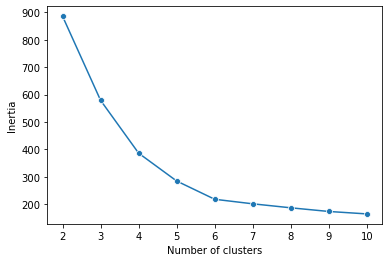

In [73]:
# Create a line plot.

plot = sns.lineplot(x=num_of_clusters, y=list_inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

The elbow in the plot is on the 6 clusters.

## **Step 4: Results and evaluation** 

Next, I'll evaluate the silhouette score using the `silhouette_score()` function. This metric helps assess how well the data points are grouped within clusters by measuring the distance between them, providing insights into the quality of clustering.

After that, I'll compare the silhouette scores for each value of `𝑘` ranging from 2 to 10. I'll create a function named `kmeans_sil` that accepts `num_clusters` and `x_vals` (X_scaled) as inputs and returns a list containing the silhouette score for each `𝑘` value.

In [66]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

def k_means_silhouettes(num_clusters, x_values):
    silhouettes = []
    for num in num_clusters:
        k_means = KMeans(n_clusters = num, random_state = 42).fit(x_values)
        silhouettes.append(silhouette_score(x_values, k_means.labels_))
    return silhouettes


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the `kmeans_sil` function video.
</details>

Next, I'll create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Using seaborn to visualize this relationship. 

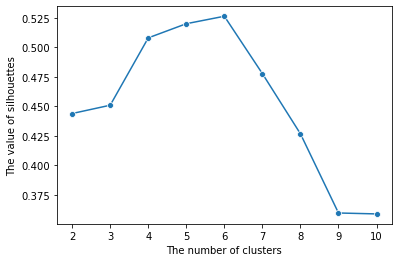

In [72]:
# Create a line plot.
silhouettes = k_means_silhouettes(num_of_clusters, X_scaled)


plot = sns.lineplot(x= num_of_clusters, y= silhouettes, marker = 'o')
plot.set_xlabel('The number of clusters')
plot.set_ylabel('The value of silhouettes')
plt.show()

- The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although five clusters also yield a relatively good silhouette score.

### Optimal k-value

To decide on an optimal k-value, I'll fit a six-cluster model to the dataset. 

In [75]:
# Fit a 6-cluster model.

k_means = KMeans(n_clusters = 6, random_state = 42).fit(X_scaled)

Printing out the unique labels of the fit model.

In [78]:
# Print unique labels.

print(np.unique(k_means.labels_))

[0 1 2 3 4 5]


Next, I'll add a new column named `cluster` to the `penguins_subset` DataFrame to indicate each data point's cluster assignment. It’s essential to interpret the meaning of the cluster labels to evaluate whether the clustering results are logical and make sense in the context of the data.

In [81]:
# Create a new column `cluster`.

penguins_subset['cluster'] = k_means.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
4,Adelie,36.7,19.3,193.0,3450.0,0,2
5,Adelie,39.3,20.6,190.0,3650.0,1,0


Using `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [83]:
# Verify if any `cluster` can be differentiated by `species`.

penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       71
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Adelie        2
         Chinstrap    34
5        Chinstrap    29
dtype: int64


Next, I'll interpret the outputs from the groupby operation. While the results indicate that each `cluster` can be distinguished by `species`, visualizing this information will provide clearer insights. The graph will illustrate how each `cluster` correlates with the different species, enhancing our understanding of the clustering results.


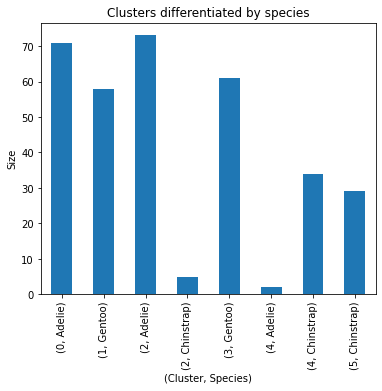

In [84]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Using `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [87]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.

penguins_subset.groupby(by=['cluster', 'species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
2        Adelie     0           73
0        Adelie     1           71
3        Gentoo     1           61
1        Gentoo     0           58
4        Chinstrap  1           34
5        Chinstrap  0           29
2        Chinstrap  0            5
4        Adelie     1            2
dtype: int64

Even though clusters 1 and 3 weren't all one species or sex, the `groupby` indicates that the algorithm produced clusters mostly differentiated by species and sex. 

Finally, I'll interpret the outputs from the groupby operation and visualize the results. The graph reveals that each `cluster` can be distinguished by both `species` and `sex_MALE`. Additionally, it shows that each cluster predominantly consists of one species and one sex, highlighting the distinct group characteristics.

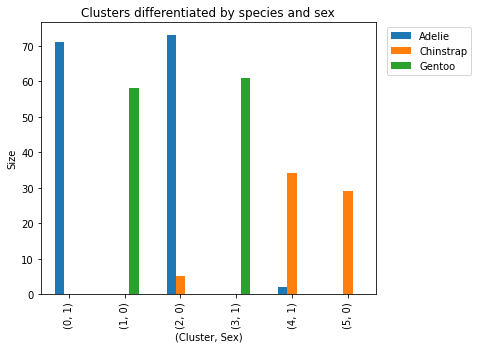

In [88]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                    xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Conclusion**

**Key Insights**

- The dataset includes 345 penguins with species, island, and sex information, featuring three distinct penguin species.

- K-means clustering identifies patterns to educate team members about penguin characteristics.

- Key preparation steps involved handling missing values, encoding categorical variables, dropping non-essential columns, and scaling features for accurate distance measures. 

-   The clusters in this project are mostly differentiated by species and sex as shown by the groupby results and corresponding graphs. 
-   The elbow plot and especially the silhouette scores suggests that 6 clusters are optimal for this data.
-   Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).


**Summary for Stakeholders**

*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.






### References

[Gorman, Kristen B., et al. “Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE, vol. 9, no. 3, Mar. 2014, p. e90081. PLoS Journals](https://doi.org/10.1371/journal.pone.0090081)

[Sklearn Preprocessing StandardScaler scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)